In [1]:
from importlib import reload
from astropy import units as u
from astropy import constants as const

import pandas as pd
import pandas as pandas
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import ticker
import matplotlib.colors
import matplotlib.ticker as mticker

from scipy.interpolate import UnivariateSpline

from src import astro530
from src import N_integrator

from scipy.special import expn

In [2]:
astro530 = reload(astro530)

In [3]:
astro530 = reload(astro530)
Planck_tau = astro530.Planck_tau

In [4]:
k_cont = astro530.k_cont
line_opacity_Na = astro530.line_opacity_Na

In [5]:
(6.433e13/u.cm**3*const.k_B*6420*u.K).cgs

<Quantity 57.02061041 P / s>

In [6]:
try: 
    raise ValueError("Break")
except:
    print("work")

work


In [7]:
init_VAL = astro530.init_VAL

In [8]:
def t500_parameters(t500):
    try: 
        val_df
    except:
        val_df = init_VAL()
    t500_arr = val_df.tau_500.to_numpy()
    T_arr = val_df["T"].to_numpy()
    Pg_arr = val_df.Ptotal.to_numpy()*val_df["Pgas/Ptotal"].to_numpy()
    uturb_arr = val_df["V"].to_numpy()
    nH_arr = val_df["n_H"].to_numpy()
    ne_arr = val_df["n_e"].to_numpy()
    rho_arr = val_df["rho"].to_numpy()
    
    T = UnivariateSpline(t500_arr,T_arr,s=0,k=2)(t500)*u.K
    Pg = UnivariateSpline(t500_arr,Pg_arr,s=0,k=2)(t500)*u.Ba
    uturb = UnivariateSpline(t500_arr,uturb_arr,s=0,k=2)(t500)*u.km/u.s
    nH = UnivariateSpline(t500_arr,nH_arr,s=0,k=2)(t500)/u.cm**3
    ne = UnivariateSpline(t500_arr,ne_arr,s=0,k=2)(t500)/u.cm**3
    rho = UnivariateSpline(t500_arr,rho_arr,s=0,k=2)(t500)*u.g/u.cm**3
    #print(t500)
    
    df = pd.DataFrame()
    
    try: 
        t500[0]
        df["tau_500"] = np.array(t500)
    except:
        df["tau_500"] = np.array([t500])
    df["T"] = np.array(T)
    df["Pgas"] = np.array(Pg)
    df["V"] = np.array(uturb)
    df["n_H"] = np.array(nH)
    df["n_e"] = np.array(ne)
    df["rho"] = np.array(rho)
    
    return df

In [9]:
simpson_wrapper = N_integrator.simpson_wrapper
simpson_wrapper

<function src.N_integrator.simpson_wrapper(xmin, xmax, n_size=0.01, n_den=None, scale='linear', function=<function linear_func at 0x0000024CB5FB9048>, **kwargs)>

In [10]:
line_opacity_Na

<function src.astro530.line_opacity_Na(nu, T=<Quantity 5000. K>, Pg=<Quantity 100. Ba>, uturb=<Quantity 0. km / s>, rho=<Quantity 10. g / cm3>, nH=<Quantity 1000000. 1 / cm3>, ne=<Quantity 1000000. 1 / cm3>, print_bool=False, **kwargs)>

In [11]:
astro530=reload(astro530)
line_opacity_Na = astro530.line_opacity_Na
k_cont = astro530.k_cont

In [12]:
init_VAL()

,h,m,tau_500,T,V,n_H,n_e,Ptotal,Pgas/Ptotal,rho
0,2543.0,0.000005,0.000000e+00,447000.0,11.28,1.005000e+09,1.205000e+09,0.1440,0.9896,2.349000e-15
1,2298.0,0.000005,3.712000e-08,141000.0,9.87,3.205000e+09,3.839000e+09,0.1470,0.9752,7.494000e-15
2,2290.0,0.000005,3.969000e-08,89100.0,9.82,5.041000e+09,5.961000e+09,0.1472,0.9614,1.179000e-14
3,2280.0,0.000005,4.491000e-08,50000.0,9.76,9.038000e+09,9.993000e+09,0.1477,0.9318,2.113000e-14
4,2274.0,0.000005,4.952000e-08,37000.0,9.73,1.201000e+10,1.318000e+10,0.1481,0.9102,2.808000e-14
5,2271.0,0.000005,5.234000e-08,32000.0,9.71,1.378000e+10,1.498000e+10,0.1483,0.8976,3.222000e-14
6,2267.0,0.000005,5.657000e-08,28000.0,9.70,1.567000e+10,1.677000e+10,0.1487,0.8840,3.665000e-14
7,2263.0,0.000005,6.124000e-08,25500.0,9.68,1.718000e+10,1.812000e+10,0.1491,0.8738,4.017000e-14
8,2255.0,0.000005,7.110000e-08,24500.0,9.64,1.797000e+10,1.881000e+10,0.1500,0.8698,4.203000e-14
9,2230.0,0.000006,1.030000e-07,24200.0,9.49,1.862000e+10,1.943000e+10,0.1530,0.8718,4.355000e-14


In [13]:
from scipy.integrate import simpson

In [121]:
def tau_nu(t500,nu=1*u.Hz,lam = None,n_size = 0.01,tmin = None,log_bool = True,**kwargs):
    """
    Calculates optical depth given τ500 and ν in Hz. 
    If you want to look over a range of t500, input a t500_min and assume t500 is your max.
    Can either calculate tau over nu or t500, not both.
    """
    
    try:
        if lam == None:
            lam = nu.to(u.AA,equivalencies=u.spectral())
            spectral_type = "frequency"
        else:
            raise ValueError("Break")
    except:
        spectral_type = "wavelength"
        try:
            nu = lam.to(u.Hz, equivalencies = u.spectral())
        except:
            nu = (lam*u.AA).to(u.Hz, equivalencies = u.spectral())
    range_type = 0        
    try:
        if tmin != None:
            range_type = 1
            try:
                lam[0]
                stop_bool = True
            except: 
                stop_bool = False
        else:
            stop_bool = False     
    except:
            raise ValueError("Something went wrong. tmin must be a single number, not a list.")
    if stop_bool:
        raise ValueError("You can't have observe over a t500 range and frequency range. Choose one at a time.")
    if range_type == 0:
        try: 
            lam[0]
            range_type = 2
        except:
            pass
    if log_bool:
        t_arr = 10**(np.arange(-7.5,np.log10(t500),n_size))
        np.insert(t_arr,0,0)
    else:
        t_arr = np.arange(0,t500+0.01*n_size,n_size)
    
    #print(t_arr)
    int_val = [] 
    #print(range_type)
    
    if range_type == 1 or range_type == 0:
        if abs(lam-5893*u.AA) > 25*u.AA:
            if range_type == 1:
                if log_bool:
                    logtmin = np.log10(tmin)
                    logtmax = np.log10(t500)

                    t500_arr = 10**(np.arange(logtmin,logtmax,n_size))
                else:
                    t500_arr = np.arange(tmin,t500+0.01*n_size,n_size)
                
                return t500_arr
            else:
                return t500
                
        
    
    for t in t_arr:
        params = t500_parameters(t)
        #print(params)
        T = params["T"].to_numpy()*u.K
        Pg = params["Pgas"].to_numpy()*u.Ba
        uturb = params["V"].to_numpy()*u.km/u.s
        rho = params["rho"].to_numpy()*u.g/u.cm**3
        nH = params["n_H"].to_numpy()/u.cm**3
        ne = params["n_e"].to_numpy()/u.cm**3
        Pe = ne*const.k_B*T
        #opacity_line = line_opacity_Na(nu,T=T[0],Pg=Pg[0],uturb=uturb[0],rho=rho[0],nH=nH[0],ne=ne[0])

        #print(nu)
        
        # Top

        opacity_line = line_opacity_Na(nu,T=T,Pg=Pg,uturb=uturb,rho=rho,nH=nH,ne=ne,ideal_gas = True,**kwargs)

        try:
            nu[0]
            opacity_line = np.sum(opacity_line,axis=1)
        except:
            opacity_line = np.sum(opacity_line)

        opacity_cont = k_cont(wavelength=lam,T=T,Pe=Pe,Pg=Pg)
        
        top = opacity_cont+opacity_line
        
        # Bottom
        
        opacity_line = np.sum(line_opacity_Na((5000*u.AA).to(u.Hz,equivalencies=u.spectral())
                                       ,T=T,Pg=Pg,uturb=uturb,rho=rho,nH=nH,ne=ne,ideal_gas = True,**kwargs))
        opacity_cont = k_cont(wavelength=5000*u.AA,T=T,Pe=Pe,Pg=Pg)
        
        bottom = opacity_line+opacity_cont
#         print("top:",top)
#         print("bottom:",bottom)
        #print(params)
        int_val.append(np.array(top/bottom))
    int_val = np.array(int_val)
    #print(int_val)
    tau_arr = []
    
    if range_type == 0:
        t = simpson(int_val,x=t_arr)
        tau_arr.append(t)
        
    elif range_type == 1:
        if log_bool:
            logtmin = np.log10(tmin)
            logtmax = np.log10(t500)
            
            t500_arr = 10**(np.arange(logtmin,logtmax,n_size))
        else:
            t500_arr = np.arange(tmin,t500+0.01*n_size,n_size)
        
        iv_spl = UnivariateSpline(t_arr,int_val,s=0,k=2)
        for t_500 in t500_arr:
            if log_bool:
                temp = 10**(np.arange(-8,np.log10(t_500),n_size))
            else:
                temp = np.arange(0,t_500,n_size)
            #print(temp)
            if len(temp) == 0:
                temp = [0]
            iv_sim = iv_spl(temp)
            t = simpson(iv_sim,x=temp)
            tau_arr.append(t)    
            
    elif range_type == 2:
        for i in range(len(lam)):
            t = simpson(int_val[:,i],x=t_arr)
            tau_arr.append(t)
        
    return np.array(tau_arr)

In [91]:
tau_nu(7, lam = 5800*u.AA,n_size=0.5,tmin=3.8e-8)

[3.16227766e-08 1.00000000e-07 3.16227766e-07 1.00000000e-06
 3.16227766e-06 1.00000000e-05 3.16227766e-05 1.00000000e-04
 3.16227766e-04 1.00000000e-03 3.16227766e-03 1.00000000e-02
 3.16227766e-02 1.00000000e-01 3.16227766e-01 1.00000000e+00
 3.16227766e+00]


array([3.80000000e-08, 1.20166551e-07, 3.80000000e-07, 1.20166551e-06,
       3.80000000e-06, 1.20166551e-05, 3.80000000e-05, 1.20166551e-04,
       3.80000000e-04, 1.20166551e-03, 3.80000000e-03, 1.20166551e-02,
       3.80000000e-02, 1.20166551e-01, 3.80000000e-01, 1.20166551e+00,
       3.80000000e+00])

In [15]:
10**-7.5

3.162277660168379e-08

In [17]:
tmin = 7e-8
tmax = 4
n_size = 0.2
#t500_arr = np.arange(tmin,tmax+0.01*n_size,n_size)
t500_arr = 10**(np.arange(np.log10(tmin),np.log10(tmax),n_size))
# t500_arr = np.insert(t500_arr,0,0)

wave_interest = np.array([5890,5896,5910])*u.AA
tn_arr = []
for lamb in wave_interest:
    tn = tau_nu(tmax,lam = lamb,n_size=n_size,tmin=tmin,log_bool=True)
    tn_arr.append(tn)
tn_arr = np.array(tn_arr)
#print(tau_nu(.995,lam = 5896*u.AA,n_size=0.4,ideal_gas=True))

[3.16227766e-08 5.01187234e-08 7.94328235e-08 1.25892541e-07
 1.99526231e-07 3.16227766e-07 5.01187234e-07 7.94328235e-07
 1.25892541e-06 1.99526231e-06 3.16227766e-06 5.01187234e-06
 7.94328235e-06 1.25892541e-05 1.99526231e-05 3.16227766e-05
 5.01187234e-05 7.94328235e-05 1.25892541e-04 1.99526231e-04
 3.16227766e-04 5.01187234e-04 7.94328235e-04 1.25892541e-03
 1.99526231e-03 3.16227766e-03 5.01187234e-03 7.94328235e-03
 1.25892541e-02 1.99526231e-02 3.16227766e-02 5.01187234e-02
 7.94328235e-02 1.25892541e-01 1.99526231e-01 3.16227766e-01
 5.01187234e-01 7.94328235e-01 1.25892541e+00 1.99526231e+00
 3.16227766e+00]
[3.16227766e-08 5.01187234e-08 7.94328235e-08 1.25892541e-07
 1.99526231e-07 3.16227766e-07 5.01187234e-07 7.94328235e-07
 1.25892541e-06 1.99526231e-06 3.16227766e-06 5.01187234e-06
 7.94328235e-06 1.25892541e-05 1.99526231e-05 3.16227766e-05
 5.01187234e-05 7.94328235e-05 1.25892541e-04 1.99526231e-04
 3.16227766e-04 5.01187234e-04 7.94328235e-04 1.25892541e-03
 1.9952

In [22]:
t500_arr

array([7.00000000e-08, 1.10942523e-07, 1.75832050e-07, 2.78675019e-07,
       4.41670141e-07, 7.00000000e-07, 1.10942523e-06, 1.75832050e-06,
       2.78675019e-06, 4.41670141e-06, 7.00000000e-06, 1.10942523e-05,
       1.75832050e-05, 2.78675019e-05, 4.41670141e-05, 7.00000000e-05,
       1.10942523e-04, 1.75832050e-04, 2.78675019e-04, 4.41670141e-04,
       7.00000000e-04, 1.10942523e-03, 1.75832050e-03, 2.78675019e-03,
       4.41670141e-03, 7.00000000e-03, 1.10942523e-02, 1.75832050e-02,
       2.78675019e-02, 4.41670141e-02, 7.00000000e-02, 1.10942523e-01,
       1.75832050e-01, 2.78675019e-01, 4.41670141e-01, 7.00000000e-01,
       1.10942523e+00, 1.75832050e+00, 2.78675019e+00])

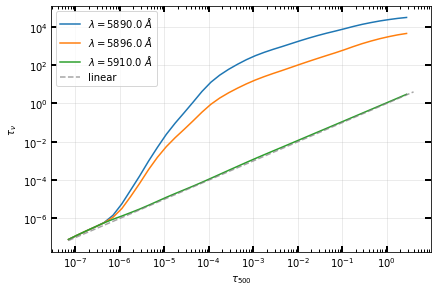

In [54]:
fig, ax = plt.subplots(figsize = (6,4), nrows = 1, ncols = 1)
fig.tight_layout(h_pad=-.5)

    
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.minorticks_on()
ax.grid(True,alpha=.3)

ax.tick_params(direction='in', axis='both',which='minor',length=3,width=1)#,labelsize=8)
ax.tick_params(direction='in',axis='both',which='major',length=6,width=2)#,labelsize=8)

ax.set_xscale("log")
ax.set_yscale("log")

ax.plot(t500_arr,tn_arr[0],label=r"$\lambda = $"+str(round(wave_interest[0].value,0))+r" $\AA$")
ax.plot(t500_arr,tn_arr[1],label=r"$\lambda = $"+str(round(wave_interest[1].value,0))+r" $\AA$")
ax.plot(t500_arr,tn_arr[2],label=r"$\lambda = $"+str(round(wave_interest[2].value,0))+r" $\AA$")
ax.plot([7e-8,4],[7e-8,4],label="linear",c='grey',alpha = 0.7, linestyle="--")

ax.set_ylabel(r"$\tau_\nu$")
ax.set_xlabel(r"$\tau_{500}$")

ax.legend()

output_file = "plots/22a.pdf"

fig.savefig(output_file,bbox_inches='tight')

In [19]:
n_size = 0.3
#t500_arr = np.arange(tmin,tmax+0.01*n_size,n_size)
wave_arr = np.linspace(5860,5930,600)*u.AA
freq_arr = wave_arr.to(u.Hz,equivalencies=u.spectral())
tau_int = np.array([-5,-1,0])
tt_arr = []
for tau in tau_int:
    t = 10.0**tau
    tn = tau_nu(t,lam = wave_arr,n_size=n_size,log_bool=True)
    tt_arr.append(tn)
tt_arr = np.array(tt_arr)
#print(tau_nu(.995,lam = 5896*u.AA,n_size=0.4,ideal_gas=True))

[3.16227766e-08 6.30957344e-08 1.25892541e-07 2.51188643e-07
 5.01187234e-07 1.00000000e-06 1.99526231e-06 3.98107171e-06
 7.94328235e-06]
[3.16227766e-08 6.30957344e-08 1.25892541e-07 2.51188643e-07
 5.01187234e-07 1.00000000e-06 1.99526231e-06 3.98107171e-06
 7.94328235e-06 1.58489319e-05 3.16227766e-05 6.30957344e-05
 1.25892541e-04 2.51188643e-04 5.01187234e-04 1.00000000e-03
 1.99526231e-03 3.98107171e-03 7.94328235e-03 1.58489319e-02
 3.16227766e-02 6.30957344e-02]
[3.16227766e-08 6.30957344e-08 1.25892541e-07 2.51188643e-07
 5.01187234e-07 1.00000000e-06 1.99526231e-06 3.98107171e-06
 7.94328235e-06 1.58489319e-05 3.16227766e-05 6.30957344e-05
 1.25892541e-04 2.51188643e-04 5.01187234e-04 1.00000000e-03
 1.99526231e-03 3.98107171e-03 7.94328235e-03 1.58489319e-02
 3.16227766e-02 6.30957344e-02 1.25892541e-01 2.51188643e-01
 5.01187234e-01]


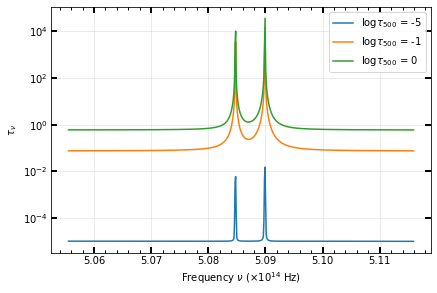

In [144]:
fig, ax = plt.subplots(figsize = (6,4), nrows = 1, ncols = 1)
fig.tight_layout(h_pad=-.5)

    
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.minorticks_on()
ax.grid(True,alpha=.3)

ax.tick_params(direction='in', axis='both',which='minor',length=3,width=1)#,labelsize=8)
ax.tick_params(direction='in',axis='both',which='major',length=6,width=2)#,labelsize=8)

#ax.set_xscale("log")
ax.set_yscale("log")

ax.plot(freq_arr/10**14,tt_arr[0],label=r"log$\tau_{500}$ = "+str(tau_int[0]))
ax.plot(freq_arr/10**14,tt_arr[1],label=r"log$\tau_{500}$ = "+str(tau_int[1]))
ax.plot(freq_arr/10**14,tt_arr[2],label=r"log$\tau_{500}$ = "+str(tau_int[2]))



ax.set_ylabel(r"$\tau_\nu$")
ax.set_xlabel(r"Frequency $\nu$ ($\times 10^{14}~$Hz)")

ax.legend()

output_file = "plots/22b.pdf"

fig.savefig(output_file,bbox_inches='tight')

In [29]:
astro530.Planck

<function src.astro530.Planck(nu=1, T=1000)>

In [46]:
nu = (5500*u.AA).to(u.Hz,equivalencies = u.spectral())
tau_nu(1,nu,n_size=0.5,tmin = 7e-8,log_bool=True)

[3.16227766e-08 1.00000000e-07 3.16227766e-07 1.00000000e-06
 3.16227766e-06 1.00000000e-05 3.16227766e-05 1.00000000e-04
 3.16227766e-04 1.00000000e-03 3.16227766e-03 1.00000000e-02
 3.16227766e-02 1.00000000e-01 3.16227766e-01]


array([2.72757277e-08, 1.13492277e-07, 3.87564627e-07, 1.21639247e-06,
       3.48946126e-06, 1.12769722e-05, 3.56147894e-05, 1.08885140e-04,
       3.46636056e-04, 1.09499807e-03, 3.46502439e-03, 1.09557044e-02,
       3.46468121e-02, 1.09552617e-01, 3.46433895e-01])

In [38]:
tau_nu

<function __main__.tau_nu(t500, nu=<Quantity 1. Hz>, lam=None, n_size=0.01, tmin=None, log_bool=True, **kwargs)>

In [87]:
tau_nu(7, lam = 5800*u.AA,n_size=0.5,tmin=3.8e-8)

[3.16227766e-08 1.00000000e-07 3.16227766e-07 1.00000000e-06
 3.16227766e-06 1.00000000e-05 3.16227766e-05 1.00000000e-04
 3.16227766e-04 1.00000000e-03 3.16227766e-03 1.00000000e-02
 3.16227766e-02 1.00000000e-01 3.16227766e-01 1.00000000e+00
 3.16227766e+00]


array([3.10649615e-08, 1.29105558e-07, 4.41644081e-07, 1.36998657e-06,
       3.71763526e-06, 1.21339516e-05, 3.81145481e-05, 1.13779064e-04,
       3.64536124e-04, 1.15181168e-03, 3.64386809e-03, 1.15051728e-02,
       3.63728170e-02, 1.14903379e-01, 3.63213807e-01, 1.14884830e+00,
       3.65965292e+00])

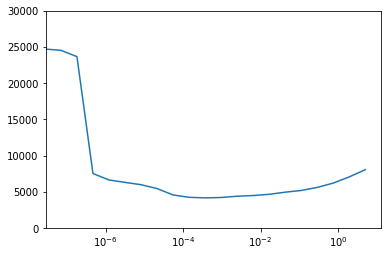

In [86]:
t_test = np.geomspace(7e-8,5,20)
t_test = np.insert(t_test,0,0)
T_arr = t500_parameters(t_test)["T"].to_numpy()

plt.xscale("log")
plt.ylim([0,3e4])

plt.plot(t_test,T_arr)


In [64]:
t500_parameters([0,1,2,3])["T"].to_numpy()

array([447000.        ,   6423.94056705,   7088.86847783,   7497.20056748])

In [95]:
Planck = astro530.Planck

In [97]:
Planck(nu=1)

<Quantity 2.24170462e-10 erg / (cm2 Hz s sr)>

In [138]:
def emergent_flux_tau(wavelength = 5000*u.AA,tmax = 5, n_size = 1e-1,):
    
    if tmax > 7:
        tmax = 7
    
    try:
        w_unit = wavelength.unit
    except:
        wavelength *= u.AA
        w_unit = u.AA
    
    try:
        wavelength[0]
        wavelength = np.array(wavelength)*w_unit
    except:
        try:
            wavelength = np.array([wavelength])*w_unit
        except:
            wavelength = np.array([wavelength.value])*w_unit
    
    nu = (1/wavelength).to(1/u.um)
    freq = wavelength.to(u.Hz,equivalencies = u.spectral())
    
    n_steps = int((np.log10(tmax)-np.log10((7e-8)))/0.3)
    
    t500_arr = 10**np.arange(np.log10(7e-8),np.log10(tmax),0.4)
    t500_arr = np.insert(t500_arr,0,0)
    T_500_arr = t500_parameters(t500_arr)["T"].to_numpy()
#     tmin_arr = []
    tmax_arr = []
    
    T_func = []
    
    n_len = len(wavelength)
    
    for i,l in enumerate(wavelength):
        tau_arr = tau_nu(tmax,lam = l,n_size=0.4,tmin = 7e-8)
        tau_arr = np.insert(tau_arr,0,0)
        
        tmax_arr.append(np.max(tau_arr))
        
        func = UnivariateSpline(tau_arr,T_500_arr,s=0,k=1)
        
        T_func.append(func)
        if i == int(n_len/4):
            print("25%")
        elif i == int(n_len/2):
            print("50%")
        elif i == int(3*n_len/4):
            print("75%")
    tmax_arr = np.array(tmax_arr)
    
    Hv_arr = []
    
    for i,l in enumerate(wavelength):
        n_steps = (np.log10(tmax_arr[i])-np.log10(7e-8))/n_size
        
        tau = 10**np.arange(np.log10(7e-8),np.log10(tmax),n_size)
        tau = np.insert(tau,0,0)
        
        T_arr = T_func[i](tau)
        
        SvE_arr = []
        S_arr = []
        
        E2 = expn(2,tau)
        
        for i,T in enumerate(T_arr):
            Sv = Planck(nu=1/(l.to(u.um)).value,T=T)
            SvE_arr.append((Sv*E2[i]).value)
            S_arr.append(Sv.value)
            
        S_arr = np.array(S_arr)
        SvE_arr = np.array(SvE_arr)

        y_arr = SvE_arr
        
        Hv = 1/2*(simpson(y_arr,x=tau))
        Hv_arr.append(Hv)
        
    print("done")
    Hv_arr = np.array(Hv_arr)*Sv.unit*u.sr
    
    return 4*np.pi*Hv_arr

In [141]:
wavel_arr = np.linspace(5860,5930,100)*u.AA
F = emergent_flux_tau(wavelength=wavel_arr)

25%
50%
75%
done


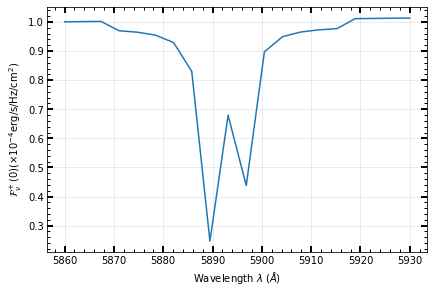

In [152]:
#plt.plot(wavel_arr,F)

fig, ax = plt.subplots(figsize = (6,4), nrows = 1, ncols = 1)
fig.tight_layout(h_pad=-.5)

    
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.minorticks_on()
ax.grid(True,alpha=.3)

ax.tick_params(direction='in', axis='both',which='minor',length=3,width=1)#,labelsize=8)
ax.tick_params(direction='in',axis='both',which='major',length=6,width=2)#,labelsize=8)

#ax.set_xscale("log")
#ax.set_yscale("log")

ax.plot(wavel_arr,F*10000,label=r"log$\tau_{500}$ = "+str(tau_int[0]))

ax.set_ylabel(r"$\mathcal{F}^+_\nu(0) (\times 10^{-4} \mathrm{erg/s/Hz/cm}^2)$")
ax.set_xlabel(r"Wavelength $\lambda$ ($\AA$)")

#ax.legend()

output_file = "plots/22c.pdf"

fig.savefig(output_file,bbox_inches='tight')

In [27]:
def emergent_flux_tau(tau_arr,tmin = 1e-8,tmax = 100, n_size = 1e-5,Teff = 5000*u.K, wavelength = 5000*u.AA):
    wavelength = np.mean(wavelength)
    nu = (1/wavelength).to(1/u.um)
    
    if tmax < np.max(tau_arr):
        tmax = np.max(tau_arr)
    
    logmax = np.log10(tmax)
    logmin = np.log10(tmin)
    
    n_steps = (logmax-logmin)/n_size
    
    Hv_arr = []
    for t in tau_arr:
#         print(t)
#         print(tmax)
#         print(n_steps/2)
        tau_out = np.geomspace(t,tmax,int(n_steps/2))
        tau_in = np.geomspace(tmin,t,int(n_steps/2)-1)
        tau_in = np.insert(tau_in,0,0)
        
        S_out = Planck_tau(tau_out, nu=nu.value,Teff=Teff)[0]
        S_in = Planck_tau(tau_in, nu=nu.value,Teff=Teff)[0]
        
#         print(S_out)
        
        E2_out = expn(2,abs(t-tau_out))
        E2_in = expn(2,abs(t-tau_in))
        
        Hv = 1/2*(simpson(S_out*E2_out,x=tau_out)-simpson(S_in*E2_in,x=tau_in))
        # Hv
        #print(Hv)
        Hv_arr.append(Hv)
    Hv_arr = np.array(Hv_arr)*S_out.unit
    
    return 4*np.pi*Hv_arr

In [28]:
Fv_arr = []
for i,t500 in enumerate(tau_int):
    Fv = emergent_flux_tau(tt_arr[i],Teff=5780*u.K,wavelength=5893*u.AA,n_size=4e-2)
    Fv_arr.append(Fv.value)
    print("Finished",t500)
Fv_arr = np.array(Fv_arr)*Fv.unit


Finished -5


C:\Users\xkncr\AppData\Roaming\Python\Python37\site-packages\scipy\integrate\_quadrature.py:414: RuntimeWarning: divide by zero encountered in true_divide
  h0divh1 = h0 / h1
C:\Users\xkncr\AppData\Roaming\Python\Python37\site-packages\scipy\integrate\_quadrature.py:414: RuntimeWarning: invalid value encountered in true_divide
  h0divh1 = h0 / h1
C:\Users\xkncr\AppData\Roaming\Python\Python37\site-packages\scipy\integrate\_quadrature.py:416: RuntimeWarning: divide by zero encountered in true_divide
  y[slice1] * (hsum * hsum / hprod) +
C:\Users\xkncr\AppData\Roaming\Python\Python37\site-packages\scipy\integrate\_quadrature.py:416: RuntimeWarning: invalid value encountered in true_divide
  y[slice1] * (hsum * hsum / hprod) +
C:\Users\xkncr\AppData\Roaming\Python\Python37\site-packages\scipy\integrate\_quadrature.py:417: RuntimeWarning: invalid value encountered in add
  y[slice2] * (2 - h0divh1))
C:\Users\xkncr\AppData\Roaming\Python\Python37\site-packages\scipy\integrate\_quadrature.py

Finished -1
Finished 0


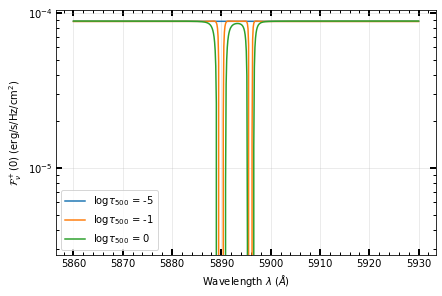

In [32]:
fig, ax = plt.subplots(figsize = (6,4), nrows = 1, ncols = 1)
fig.tight_layout(h_pad=-.5)

    
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.minorticks_on()
ax.grid(True,alpha=.3)

ax.tick_params(direction='in', axis='both',which='minor',length=3,width=1)#,labelsize=8)
ax.tick_params(direction='in',axis='both',which='major',length=6,width=2)#,labelsize=8)

#ax.set_xscale("log")
ax.set_yscale("log")

ax.plot(wave_arr,Fv_arr[0],label=r"log$\tau_{500}$ = "+str(tau_int[0]))
ax.plot(wave_arr,Fv_arr[1],label=r"log$\tau_{500}$ = "+str(tau_int[1]))
ax.plot(wave_arr,Fv_arr[2],label=r"log$\tau_{500}$ = "+str(tau_int[2]))



ax.set_ylabel(r"$\mathcal{F}^+_\nu (0)$ (erg/s/Hz/cm$^2$)")
ax.set_xlabel(r"Wavelength $\lambda$ ($\AA$)")

ax.legend()

output_file = "plots/22c.pdf"

fig.savefig(output_file,bbox_inches='tight')

In [ ]:
plt.yscale("log")
plt.plot(wave_arr,Hv)

In [ ]:
Planck_tau([0.5,1],nu=3)

In [ ]:
emergent_flux_tau([0.5,1],n_size=1e-2)

In [ ]:
params = t500_parameters(0)
params["T"].to_numpy()

In [ ]:
eddington_flux

In [ ]:
#t_arr = np.logspace(-16,2,10**5)
#eddington_flux(t_arr,tmin=1e-16,tmax=100,n_size=18/10**5)
Hv_arr = []
i_max = len(tn)
for i,tau in enumerate(tn):
    Hv_arr.append(eddington_flux([tau],n_size=10**-3,tmax = np.max(tn),src_func=Planck_tau,
                    nu=(1/(5900*u.AA)).to(1/u.um).value,Teff=5780*u.K))
    if i%int(i_max/2)==0:
        print(i)
Fv = 4*np.pi*Hv

In [ ]:
plt.plot(wave_arr,Fv)

In [ ]:
1%i_max/2)

In [ ]:
from scipy.special import expn

In [ ]:
def source_func(t, a0 = 1, a1 = 1, a2 = 1):
    """ Radiative transfer source function
    Given τ_ν as a single value or an array, and key word values for a_n where 
    n < 3, the function will output the source function value. This is viable 
    up to quadratic form.
    
    input parameters:
    
    t [float or array]: values for τ_ν, the optical depth.
    a0 [float]: Named variable for the zeroth order source term
    a1 [float]: Named variable for the linear source term
    a2 [float]: Named variable for the quadratic source term. Set to zero for a 
                linear source function.
                
    output values:
    
    S_ν [float or array]: outputs the value(s) for the source function. 
    
    """
    return a0+a1*t+a2*t**2

def SvxEn(tval, tau = 0, n=2, src_func = source_func, **kwargs):
    S = src_func(tval, **kwargs)
    
    if n == 1 and abs(tval-tau) == 0: return S*229.7  # E1(1e-100)
    
    En = expn(n,abs(tval-tau))
    
    return S*En

def eddington_flux(t_arr, tmin = 0, tmax = 1e2, n_size = 1e-5, src_func = source_func, 
                       int_wrapper=simpson_wrapper, **kwargs):
    """ Eddington Flux H_ν(t)
    Given an array of τ_ν, an optional function variable and keywords for said 
    function, this function will output the eddington flux at zero optical 
    depth as calculated using numerical integration with scipy.integrate.simpson  
    
    input parameters:
    
    t_arr [array-like]: values for optical depth from 0 to infinity.
    src_dunc [function]: name of the source function's function which is given 
                         at least optical depth values in array form. 
    int_wrapper [function]: name of the integration wrapper function which will 
                            numerically solve the flux problem. Make sure the 
                            function's inputs follow the same format as 
                            N_integrator.simpson_wrapper. 
    kwargs: keyword arguments for the source function and integrator.
    
    output values:
    
    H_ν(0) [float]: Outputs the value for the eddington flux at a τ_ν = 0.
    """
    t_arr = np.array(t_arr)
    #print(t_arr)
    src0 = src_func(t_arr[0], **kwargs)
    #print(src0)
    src_shape = np.shape(t_arr)
    
    #print(src_shape)
    
    if (src0*u.g).unit == u.g:
        Hv_unit = 1
    else:
        Hv_unit = src0.unit * u.sr
        
    if src_shape[0] == 1:    
        Hv = np.zeros(len(t_arr))
        twoD = False
    else:
        Hv = np.zeros((src_shape[0],len(t_arr))).T
        twoD = True
    
    len_t = len(t_arr)
    
    for i in range(len_t):
        
        tv = t_arr[i]
        #print(tv)
        
        if tv < 0: raise ValueError("Optical depth cannot be negative. Fix index = "+str(i))
        
        
        
        outward = int_wrapper(tv,tmax,n_size = n_size, scale = "log", function=SvxEn, 
                                  tau = tv, n = 2, src_func = src_func, **kwargs)
        inward = -int_wrapper(tmin,tv,n_size = n_size, scale = "log", function=SvxEn, 
                                      tau = tv, n = 2, src_func=src_func, **kwargs)
#         print(outward)
#         print(inward)
        if twoD:
            Hv_temp = 1/2*(outward+inward)
            for j in range(src_shape[0]):
                Hv[i,j] = Hv_temp[j]
        else:
            Hv[i] = 1/2*(outward+inward)
        if len_t > 4:
            if i == 0: print(round(100/len_t,0),"% Done")    
            if i%int(len_t/4): print("25% Done")
            if i%int(len_t/2): print("50% Done")
            if i%int(3*len_t/4): print("75% Done")
            
    return Hv*Hv_unit

In [ ]:
eddington_flux([0],tmax=1000,n_size=1e-4)

In [ ]:
tau_arr = []
for tau in tn:
    tau_arr.append(eddington_flux([tau],tmax=np.max(tn),n_size=1e-4)[0])

In [ ]:
np.min(tau_arr)

In [ ]:
plt.yscale("log")
plt.plot(wave_arr,tau_arr)

In [ ]:
fig, ax = plt.subplots(figsize = (6,4), nrows = 1, ncols = 1)
fig.tight_layout(h_pad=-.5)

    
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.minorticks_on()
ax.grid(True,alpha=.3)

ax.tick_params(direction='in', axis='both',which='minor',length=3,width=1)#,labelsize=8)
ax.tick_params(direction='in',axis='both',which='major',length=6,width=2)#,labelsize=8)

#ax.set_xscale("log")
ax.set_yscale("log")

ax.plot(wave_arr,tau_arr)

ax.set_ylabel(r"$\mathcal{F}^+_\nu(0)$ (erg/Hz/s/cm$^2$)")
ax.set_xlabel(r"Wavelength $\lambda$ ($\AA$)")

# ax.legend()

output_file = "plots/22c.pdf"

fig.savefig(output_file,bbox_inches='tight')

In [ ]:
y = Planck_tau(tn, nu=(1/(5900*u.AA)).to(1/u.um).value,Teff=5800*u.K)
E2 = expn(2,abs())
plt.plot(wave_arr,y[0])

In [ ]:
tau = 100
tau_out = np.geomspace(tau,10**4,10**3)
tau_in = np.geomspace(1e-8,tau,10**3)
tau_in = np.insert(tau_in,0,0)

S_out = Planck_tau(tau_out, nu=(1/(5900*u.AA)).to(1/u.um).value,Teff=5800*u.K)[0]
S_in = Planck_tau(tau_in, nu=(1/(5900*u.AA)).to(1/u.um).value,Teff=5800*u.K)[0]

E2_out = expn(2,abs(tau_out-tau))
E2_in = expn(2,abs(tau_in-tau))

Hv = 1/2*(simpson(S_out*E2_out,x=tau_out)-simpson(S_in*E2_in,x=tau_in))

In [ ]:
Hv

In [ ]:
plt.plot(wave_arr,Hv)

In [ ]:
def Planck2(freq=[1e5]*u.Hz,wave=None,T=5800*u.K):
    try:
        if wave == None:
            pass
        else:
            raise ValueError("Break")
    except:
        try:
            freq = wave.to(u.Hz, equivalencies = u.spectral())
        except:
            freq = (wave*u.AA).to(u.Hz, equivalencies = u.spectral())
    
    B = 2*const.h*freq**3/const.c**2 * (np.exp(const.h*freq/(const.k_B*T))-1)**-1
    
    return B.to(u.erg*u.cm**-2*u.Hz**-1*u.s**-1)/u.sr

In [ ]:
Planck2(wave=np.array([5800,5900])*u.AA,T=5900*u.K)

In [ ]:
t500_parameters(.8)["T"].to_numpy()[0]

In [ ]:
SvxEn

In [ ]:
SvxEn(3,tau=0.8, n = 2, src_func=Planck2,wave=5900*u.AA,T=5900*u.K)

In [ ]:
t500 = 0.8
params = t500_parameters(t500)
wave_arr = np.linspace(5880,5920,2)*u.AA
n_size = 0.7
tau = tau_nu(t500,lam = wave_arr,n_size=n_size,log_bool=True)

print("Done wavelength")

In [ ]:
t_v = np.logspace(-8,0,5*10**2)
y_arr = []
for i in range(len(tau)):
    y = SvxEn(t_v,tau=tau[i],n=2,src_func=Planck2,wave = wave_arr[i],T=params["T"].to_numpy()[0]*u.K)
    y_arr.append(y.value)
y_arr = np.array(y_arr)*y.unit

In [ ]:
simpson(y_arr[0],)